In [1]:
#vamos caregar o modulo pandas
import pandas as pd
#importar biblioteca do pandas datareader
from pandas_datareader import data as pdr
#importar a bliblioteca Numpy
import numpy as np
import matplotlib.pyplot as plt

In [7]:
carteira = ['PG','MSFT','F','GE']
mdata = pd.DataFrame()
for t in carteira:
    mdata[t] = pdr.DataReader(t,data_source='yahoo',start='1995-1-1')['Adj Close']

In [8]:
mdata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.362402,2.413537,3.256691,2.729230
1995-01-04,6.311406,2.431082,3.344314,2.729230
1995-01-05,6.222151,2.390982,3.315107,2.735919
1995-01-06,6.234900,2.431082,3.315107,2.722540
1995-01-09,6.209402,2.416045,3.373522,2.695783


# vamos normalizar os dados para que quando plotados em um grafico todos saiam do msm ponto (Pt/p0)*100

In [11]:
#extraindo o primeiro valor da tabela apenas para testar 
mdata.iloc[0]    

PG      6.362402
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

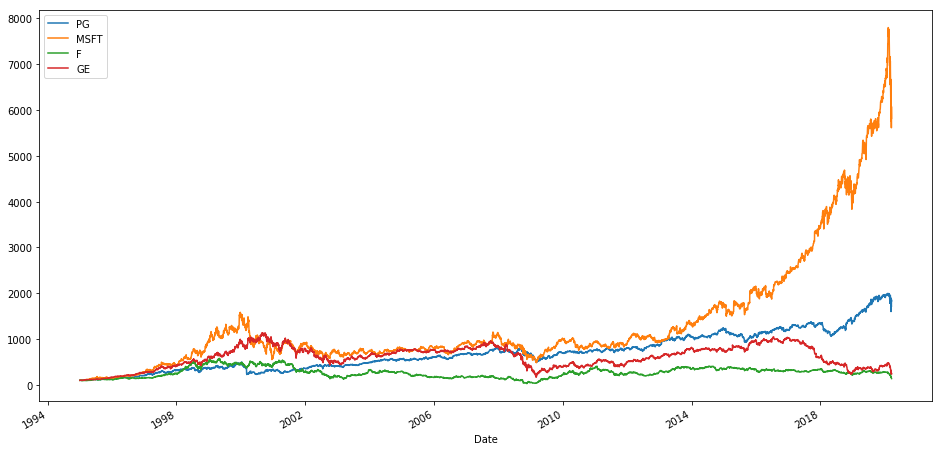

In [15]:
#normalizar valores
(mdata / mdata.iloc[0] * 100).plot(figsize = (16,8));

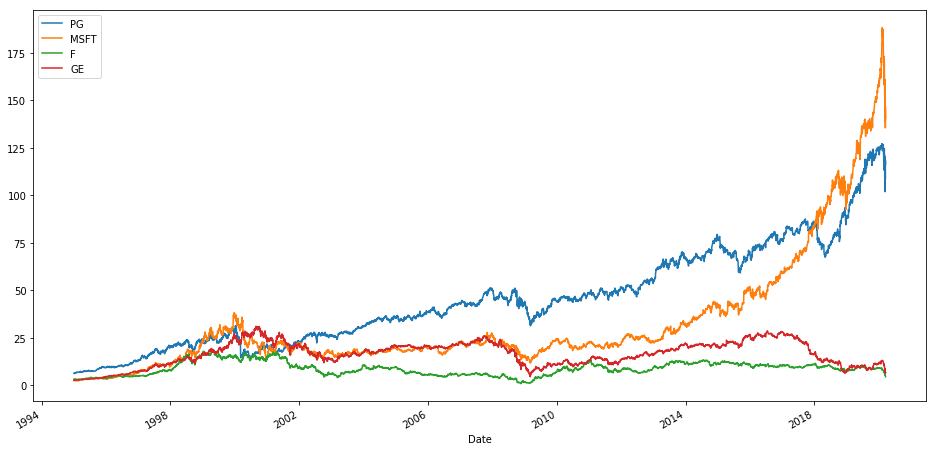

In [16]:
# sem normalizar valores
(mdata).plot(figsize = (16,8));

 # calculando o retorno de uma carteira

In [17]:
retorno = (mdata/mdata.shift(1)) -1
retorno.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008015,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [18]:
pesoscarteira = np.array([0.25,0.25,0.25,0.25])

In [20]:
#temos o valor no tempo com o pesso de cada dia, porem nõa é isso que eu quero, eu quero um unico valor
# então na prixima celular vou fazer uma media no ano assim resolvo isso.
np.dot(retorno, pesoscarteira)

array([        nan,  0.00653998, -0.00922988, ..., -0.11448416,
        0.05879229, -0.05636864])

In [22]:
retorno_anual = retorno.mean() * 250
retorno_anual

PG      0.140046
MSFT    0.209767
F       0.090266
GE      0.082643
dtype: float64

In [24]:
np.dot(retorno_anual, pesoscarteira)

0.13068039866829934

In [25]:
portifolio_1 = str(round(np.dot(retorno_anual, pesoscarteira),5)*100) + '%'
print (portifolio_1)

13.068%


In [27]:
#vamos fazer outro balaciamento da carteria colocando outros pesos
pesoscarteira2 = np.array([0.40,0.40,0.15,0.05])
portifolio_2 = str(round(np.dot(retorno_anual, pesoscarteira2),5)*100) + '%'
print (portifolio_2)

15.76%
